In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.ticker as ticker
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder




In [9]:
df= pd.read_csv("master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [11]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [13]:
#random rows in dataset
df.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
8157,El Salvador,1998,female,35-54 years,22,582217,3.78,El Salvador1998,NaN,"10,936,669,900",2185,Boomers
12896,Italy,1994,male,75+ years,585,1330197,43.98,Italy1994,NaN,"1,095,590,833,694",20235,G.I. Generation
22950,Slovakia,2006,male,55-74 years,0,412451,0.00,Slovakia2006,NaN,"70,596,729,394",13763,Silent
4792,Bulgaria,2005,female,15-24 years,20,513893,3.89,Bulgaria2005,0.749,"29,636,617,750",4003,Millenials
733,Argentina,1997,male,55-74 years,457,2252148,20.29,Argentina1997,NaN,"292,859,000,000",9057,Silent


In [15]:
df.sample(frac=0.1)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
8007,Ecuador,2011,male,25-34 years,161,1202963,13.38,Ecuador2011,0.723,"79,276,664,000",5836,Millenials
2964,Barbados,1991,male,55-74 years,1,13000,7.69,Barbados1991,NaN,"2,007,109,829",8469,Silent
10066,Greece,1988,female,25-34 years,11,699600,1.57,Greece1988,NaN,"76,261,278,405",8070,Boomers
7754,Ecuador,1990,male,25-34 years,89,788540,11.29,Ecuador1990,0.645,"15,239,278,100",1732,Boomers
26456,United Arab Emirates,2009,female,15-24 years,7,385569,1.82,United Arab Emirates2009,NaN,"253,547,358,747",34960,Millenials
...,...,...,...,...,...,...,...,...,...,...,...,...
10876,Guatemala,2000,male,35-54 years,19,781304,2.43,Guatemala2000,0.552,"19,288,827,159",1977,Boomers
18003,Norway,1997,male,15-24 years,58,287200,20.19,Norway1997,NaN,"161,354,369,893",39335,Generation X
24031,Sri Lanka,2006,female,5-14 years,11,1606015,0.68,Sri Lanka2006,NaN,"28,267,410,543",1580,Millenials
7105,Czech Republic,1990,female,15-24 years,34,747900,4.55,Czech Republic1990,0.761,"40,477,403,220",4168,Generation X


In [18]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [19]:
df.iloc[:,1:5].describe()

,year,suicides_no
count,27820.000000,27820.000000
mean,2001.258375,242.574407
std,8.469055,902.047917
min,1985.000000,0.000000
25%,1995.000000,3.000000
50%,2002.000000,25.000000
75%,2008.000000,131.000000
max,2016.000000,22338.000000


In [20]:
#The info function shows the data types and numerical values of the features in our data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [21]:
#We will now set the headings of the feature values in the data set.
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [23]:
#so,change the names of the column. Because there may be problems for future analysis.
data=df.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age','suicides_no':'SuicidesNo','population':'Population','suicides/100k pop':'Suicides100kPop','country-year':'CountryYear','HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYearMoney','gdp_per_capita ($)':'GdpPerCapitalMoney','generation':'Generation'})


In [25]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [26]:
#And, how many rows and columns are there for all data?
print('Data Shape :')
df.shape

Data Shape :


(27820, 12)

In [27]:
df.isnull().any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

In [29]:
#Now,I will check null on all data and If data has null, I will sum of null data's. In this way, how many missing data is in the data.
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

Min Year : 1985
Max Year : 2016


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

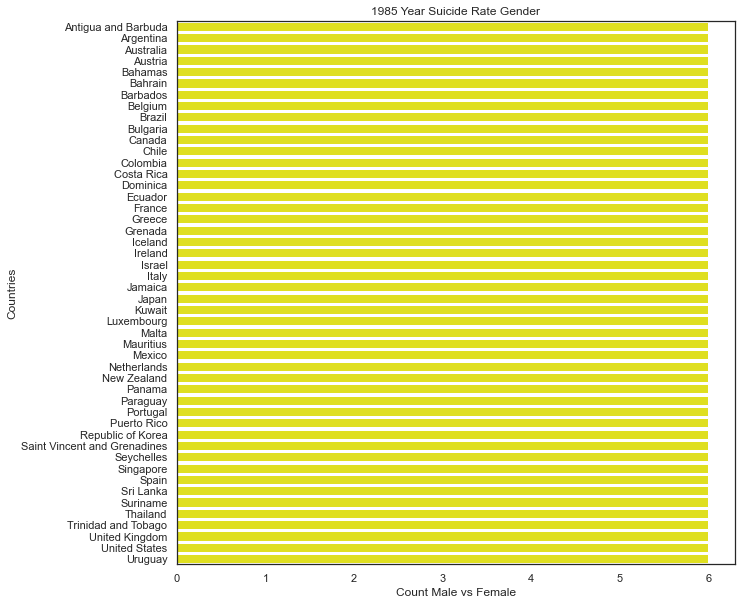

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

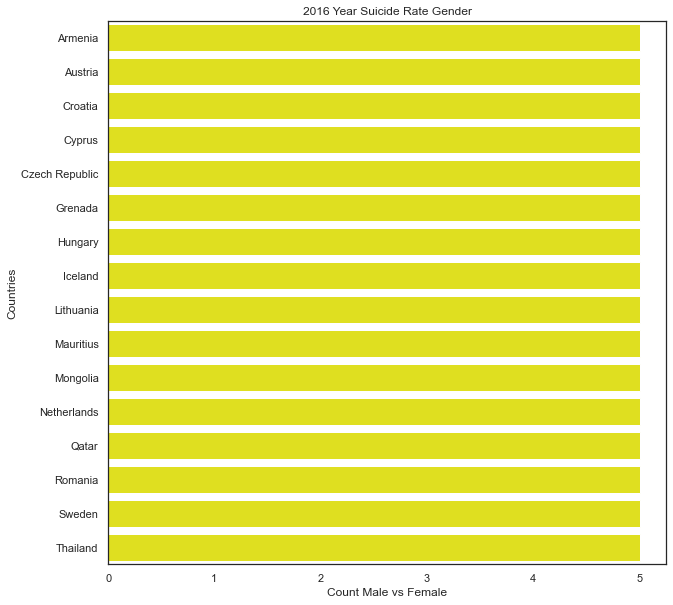

In [101]:
#Now start analysis, min year and max year will find them
min_year=min(df.year)
max_year=max(df.year)
print('Min Year :',min_year)
print('Max Year :',max_year)

#1985 min year,2016 max year.

df_country=df[(df['year']==min_year)]

country_1985=df[(df['year']==min_year)].country.unique()
country_1985_male=[]
country_1985_female=[]

for country in country_1985:
    country_1985_male.append(len(df_country[(df_country['country']==country)&(df_country['sex']=='male')]))
    country_1985_female.append(len(df_country[(df_country['country']==country)&(df_country['sex']=='female')])) 
    
#We found the ratio of men and women who committed suicide in some countries in 1985 and we are now charting.

plt.figure(figsize=(10,10))
sns.barplot(y=country_1985,x=country_1985_male,color='blue')
sns.barplot(y=country_1985,x=country_1985_female,color='yellow')
plt.ylabel('Countries')
plt.xlabel('Count Male vs Female')
plt.title('1985 Year Suicide Rate Gender')
plt.show()

#Very odd all the rates came on an equal level. So let's do max year.

df_country=df[(df['year']==max_year)]

country_2016=df[(df['year']==max_year)].country.unique()
country_2016_male=[]
country_2016_female=[]

for country in country_2016:
    country_2016_male.append(len(df_country[(df_country['country']==country)&(df_country['sex']=='male')]))
    country_2016_female.append(len(df_country[(df_country['country']==country)&(df_country['sex']=='female')])) 
    
#We found the ratio of men and women who committed suicide in some countries in 1985 and we are now charting.

plt.figure(figsize=(10,10))
sns.barplot(y=country_2016,x=country_2016_male,color='red')
sns.barplot(y=country_2016,x=country_2016_female,color='yellow')
plt.ylabel('Countries')
plt.xlabel('Count Male vs Female')
plt.title('2016 Year Suicide Rate Gender')
plt.show()

In [6]:
df= pd.read_csv("master.csv")
df.columns

<IPython.core.display.Javascript object>

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

<IPython.core.display.Javascript object>

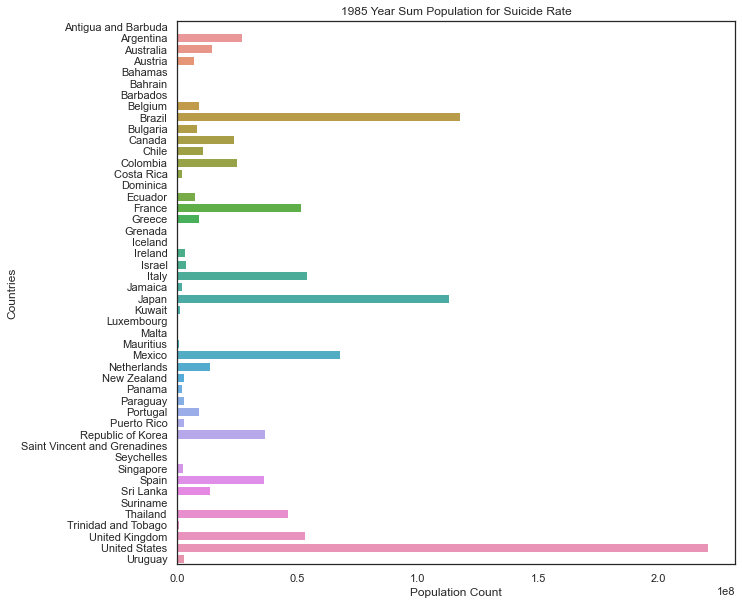

NameError: name 'data' is not defined

In [103]:
df_country=df[(df['year']==min_year)]

country_1985_population=[]

for country in country_1985:
    country_1985_population.append(sum(df_country[(df_country['country']==country)].population))    

#Now year 1985 find sum population every country

plt.figure(figsize=(10,10))
sns.barplot(y=country_1985,x=country_1985_population)
plt.xlabel('Population Count')
plt.ylabel('Countries')
plt.title('1985 Year Sum Population for Suicide Rate')
plt.show()

#######################################################

df_country=data[(df['Year']==max_year)]

country_2016_population=[]

for country in country_2016:
    country_2016_population.append(sum(data_country[(data_country['Country']==country)].Population))    

#Now year 1985 find sum population every country

plt.figure(figsize=(10,10))
sns.barplot(y=country_2016,x=country_2016_population)
plt.xlabel('Population Count')
plt.ylabel('Countries')
plt.title('2016 Year Sum Population for Suicide Rate')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

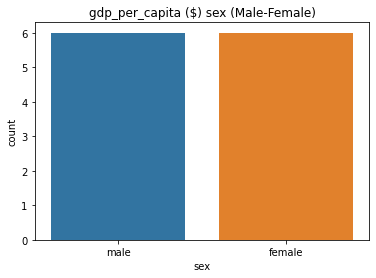

In [5]:
df= pd.read_csv("master.csv")
df.head()
sns.countplot(df[df['gdp_per_capita ($)']==126352].sex)
plt.title("gdp_per_capita ($) sex (Male-Female)")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

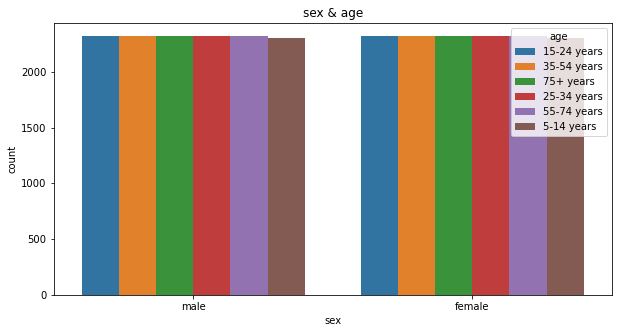

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(df.sex,hue=df.age)
plt.title('sex & age')
plt.show()
#there has been an even gender & hue age distribution.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

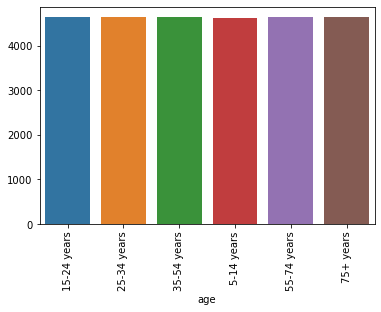

In [9]:
sns.barplot(x=df.groupby('age')['sex'].count().index,y=df.groupby('age')['sex'].count().values)
plt.xticks(rotation=90)
plt.show()

In [16]:
suicides_no=[]
for country in df.country.unique():
    suicidesNo.append(sum(df[df['country']==country].suicides_no)) 

In [18]:
suicides_no=pd.DataFrame(suicides_no,columns=['suicides_no'])
country=pd.DataFrame(df.country.unique(),columns=['country'])
data_suicide_countr=pd.concat([suicides_no,country],axis=1)
#sns.barplot(x=data.Country.unique(),y=suicidesNo) 
#plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
data_suicide_countr=data_suicide_countr.sort_values(by='suicides_no',ascending=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

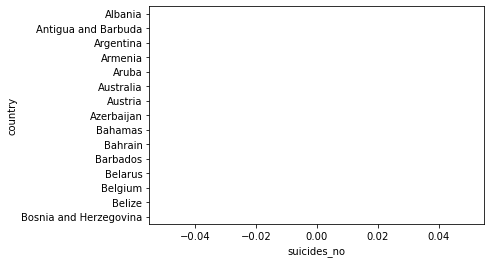

In [21]:
sns.barplot(y=data_suicide_countr.country[:15],x=data_suicide_countr.suicides_no[:15])
plt.show()

In [24]:
grouop_data=df.groupby(['age','sex'])['suicides_no'].sum().unstack()
grouop_data=grouop_data.reset_index().melt(id_vars='age')

In [25]:
grouop_data_female=grouop_data.iloc[:6,:]
grouop_data_male=grouop_data.iloc[6:,:]

In [26]:
grouop_data_female

,age,sex,value
0,15-24 years,female,175437
1,25-34 years,female,208823
2,35-54 years,female,506233
3,5-14 years,female,16997
4,55-74 years,female,430036
5,75+ years,female,221984


In [27]:
grouop_data_male

,age,sex,value
6,15-24 years,male,633105
7,25-34 years,male,915089
8,35-54 years,male,1945908
9,5-14 years,male,35267
10,55-74 years,male,1228407
11,75+ years,male,431134


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

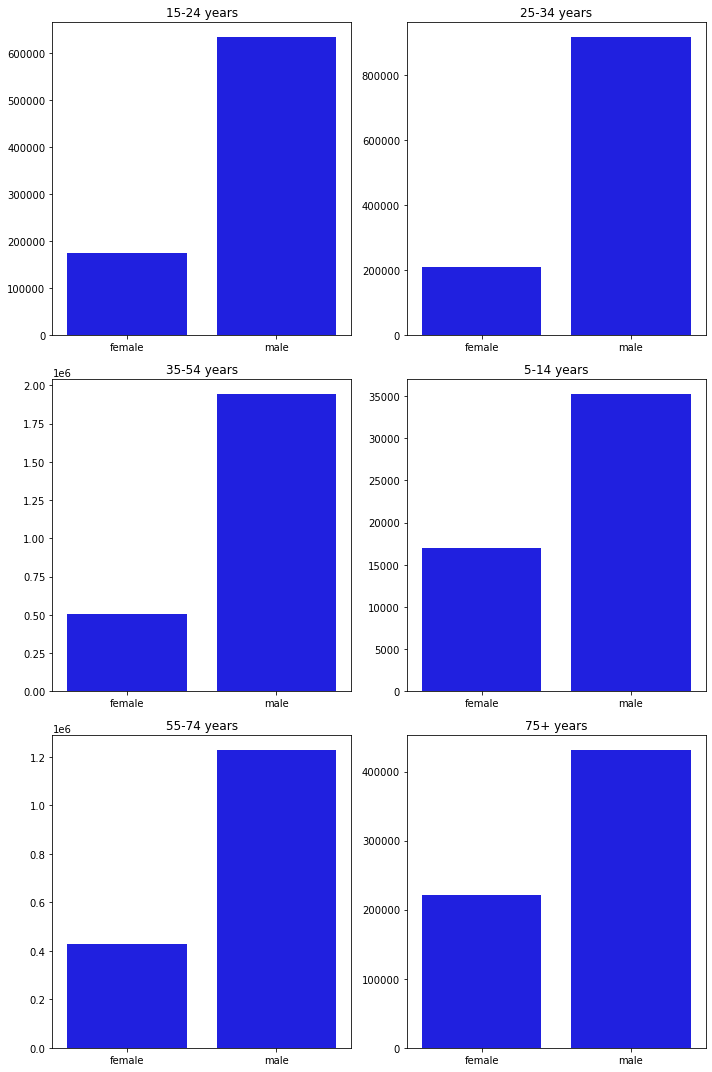

In [28]:
female_=[175437,208823,506233,16997,430036,221984]
male_=[633105,915089,1945908,35267,1228407,431134]
plot_id = 0
for i,age in enumerate(['15-24 years','25-34 years','35-54 years','5-14 years','55-74 years','75+ years']):
    plot_id += 1
    plt.subplot(3,2,plot_id)
    plt.title(age)
    fig, ax = plt.gcf(), plt.gca()
    sns.barplot(x=['female','male'],y=[female_[i],male_[i]],color='blue')
    plt.tight_layout()
    fig.set_size_inches(10, 15)
plt.show()  

<IPython.core.display.Javascript object>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

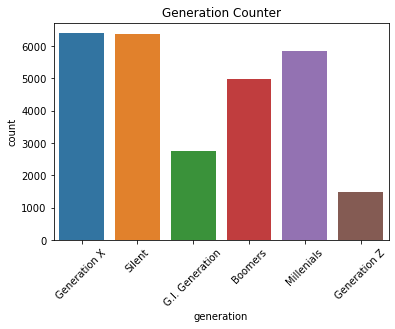

In [31]:
sns.countplot(df.generation)
plt.title('Generation Counter')
plt.xticks(rotation=45)
plt.show()

<IPython.core.display.Javascript object>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

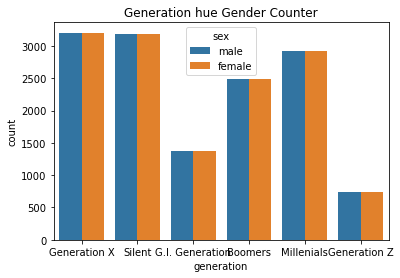

In [35]:
sns.countplot(df.generation,hue=df.sex)
plt.title('Generation hue Gender Counter')
plt.show()

In [37]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

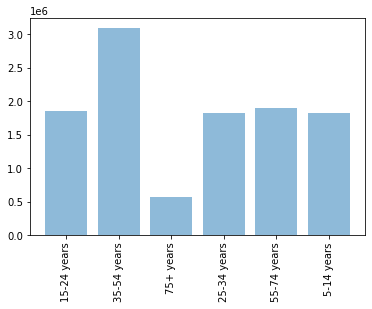

In [40]:
index_population=[]
for age in df['age'].unique():
    index_population.append(sum(df[df['age']==age].population)/len(df[df['age']==age].population))
    
plt.bar(['15-24 years','35-54 years','75+ years','25-34 years','55-74 years','5-14 years'],index_population,align='center',alpha=0.5)
plt.xticks(rotation=90)
plt.show()

In [41]:
index_population


[1861901.5286514433,
 3096916.8726841877,
 573735.728780698,
 1817773.284575614,
 1896433.7225333909,
 1821842.3507592191]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

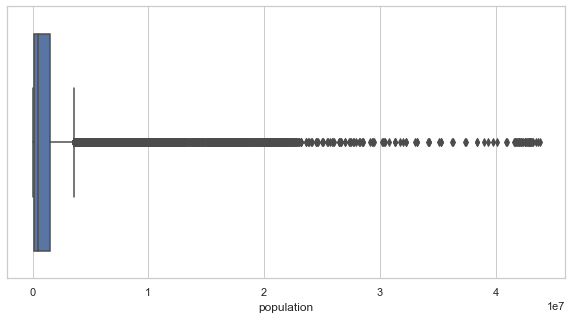

In [43]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.boxplot(df['population'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

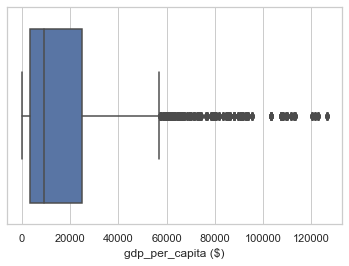

In [45]:
sns.set(style='whitegrid')
sns.boxplot(df['gdp_per_capita ($)'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

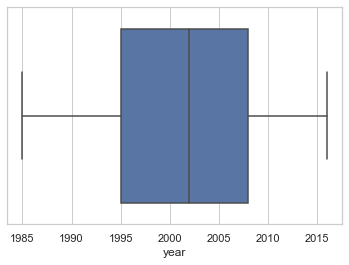

In [47]:
sns.set(style='whitegrid')
sns.boxplot(df.year)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

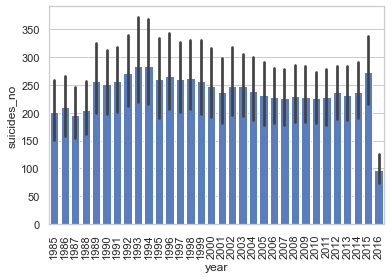

In [50]:
# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="year", y="suicides_no", data=df,
            label="Year Suicides", color="b")
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

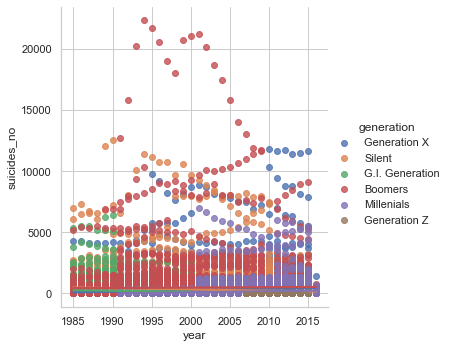

In [52]:
# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="year", y="suicides_no", hue="generation",
               truncate=True, height=5, data=df)

# Use more informative axis labels than are provided by default
g.set_axis_labels("year", "suicides_no")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

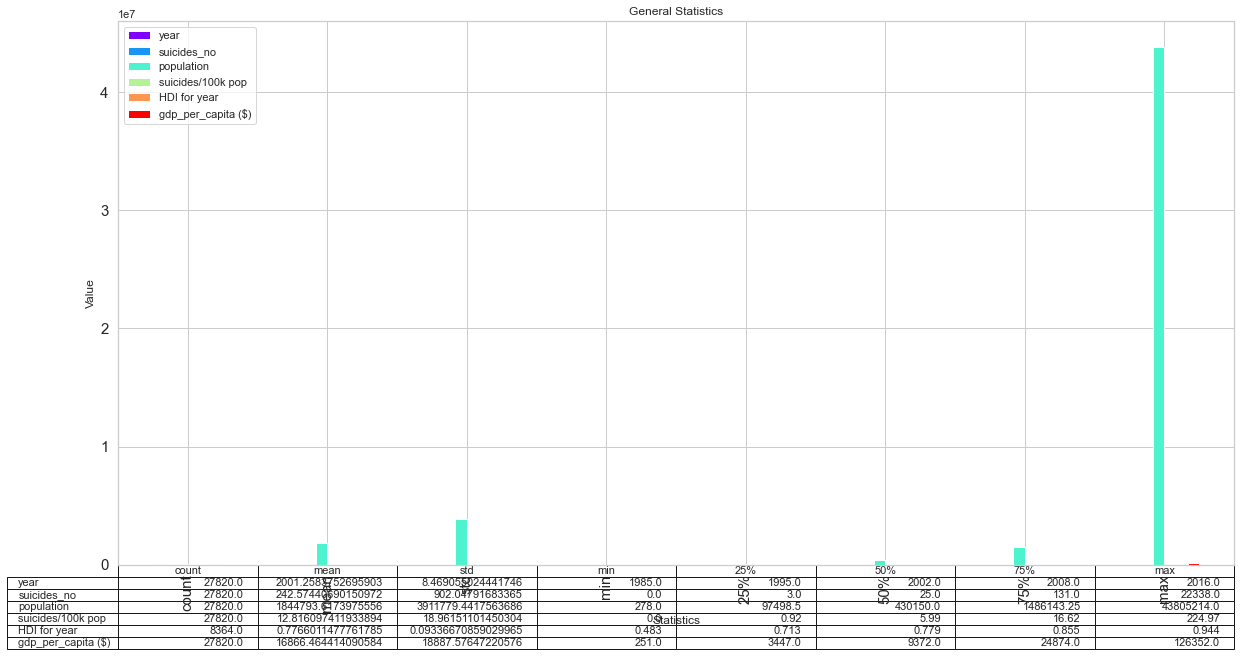

In [56]:
df.describe().plot(kind = "bar",fontsize=15, figsize = (20,10), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

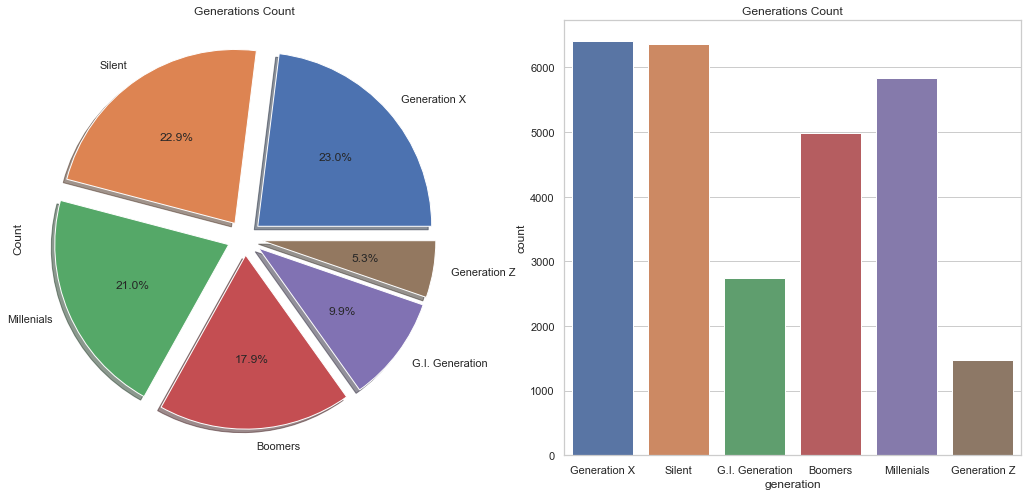

In [59]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['generation'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Generations Count')
ax[0].set_ylabel('Count')
sns.countplot('generation',data=df,ax=ax[1])
ax[1].set_title('Generations Count')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

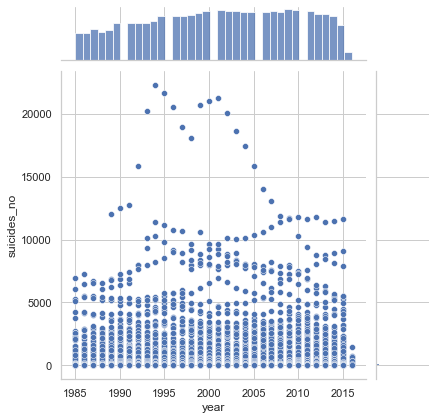

In [62]:
fig=sns.jointplot(y='suicides_no',x='year',data=df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

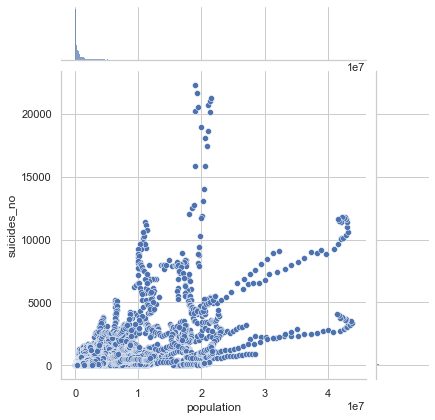

In [64]:
fig=sns.jointplot(y='suicides_no',x='population',data=df)
plt.show()

<IPython.core.display.Javascript object>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

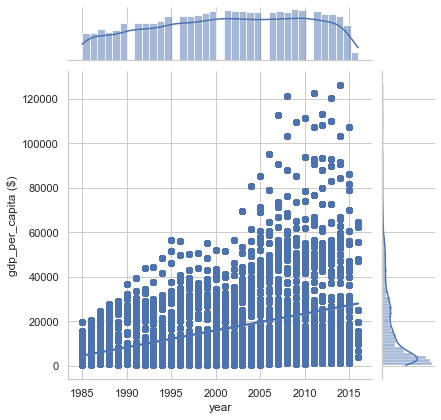

In [65]:
sns.jointplot("year", "gdp_per_capita ($)", data=df, kind="reg")
plt.show()

<IPython.core.display.Javascript object>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

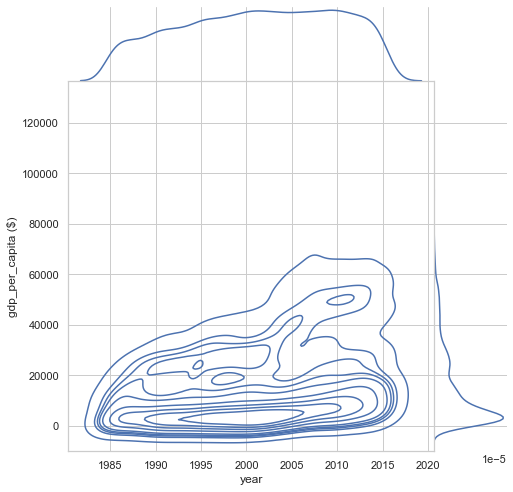

In [72]:
# Show the joint distribution using kernel density estimation
g = sns.jointplot(df['year'],df['gdp_per_capita ($)'] ,kind="kde", height=7, space=0)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

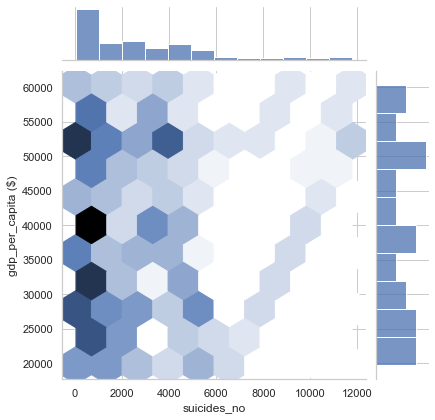

In [73]:
fig=sns.jointplot(y='gdp_per_capita ($)',x='suicides_no',kind='hex',data=df[df['country']=='United States'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

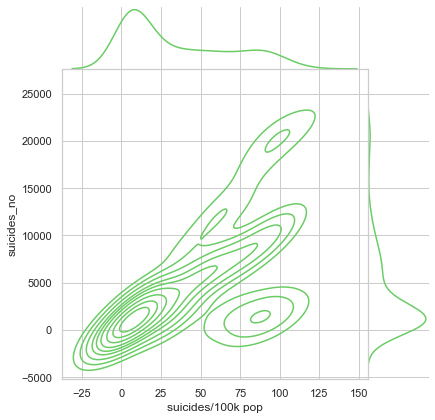

In [78]:
sns.jointplot("suicides/100k pop", "suicides_no", data=df[df['country']=='Russian Federation'], kind="kde",space=0,color='g')
plt.show()

<IPython.core.display.Javascript object>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


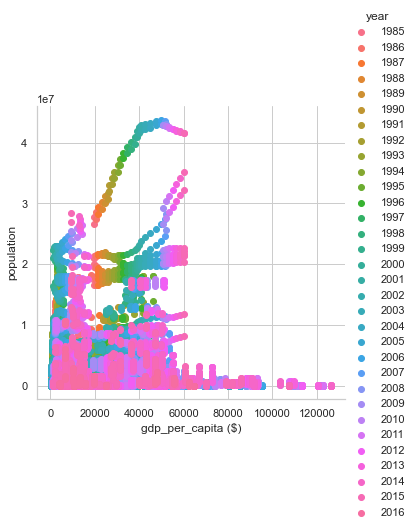

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.FacetGrid(df,hue='year',size=5).map(plt.scatter,'gdp_per_capita ($)','population').add_legend()
plt.show()

<IPython.core.display.Javascript object>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

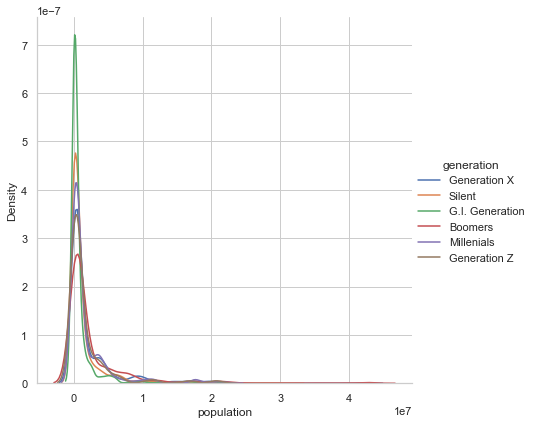

In [82]:
sns.FacetGrid(df, hue="generation", size=6).map(sns.kdeplot, "population").add_legend()
plt.ioff() 
plt.show()

<IPython.core.display.Javascript object>

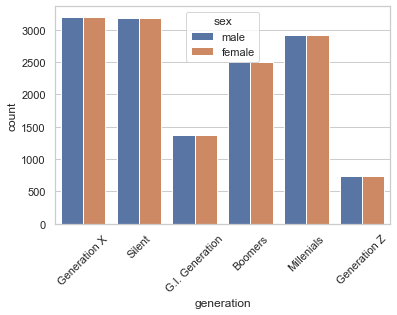

In [84]:
sns.countplot(x="generation", hue="sex",
                 data=df)
plt.xticks(rotation=45)
plt.show()

<IPython.core.display.Javascript object>

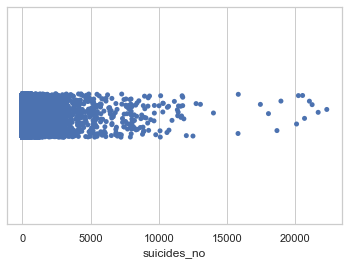

In [86]:
sns.stripplot(x=df['suicides_no'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

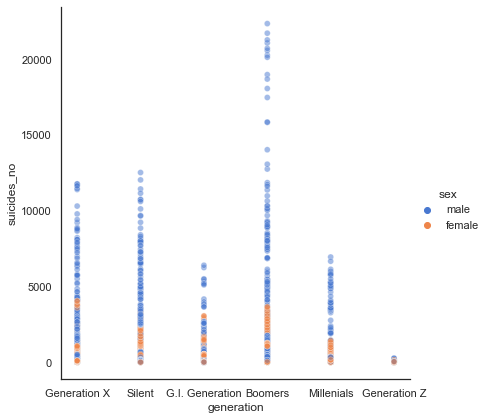

In [88]:
sns.set(style="white")
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="generation",y="suicides_no",hue="sex",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)
plt.show()

<IPython.core.display.Javascript object>

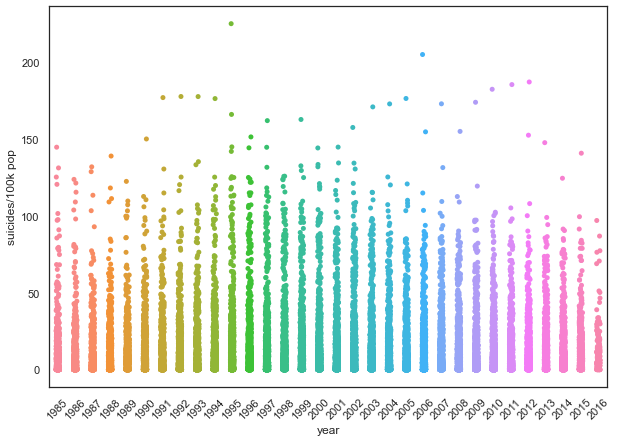

In [90]:
plt.figure(figsize=(10,7))
sns.stripplot(x="year",y='suicides/100k pop',data=df)
plt.xticks(rotation=45)
plt.show()

<IPython.core.display.Javascript object>

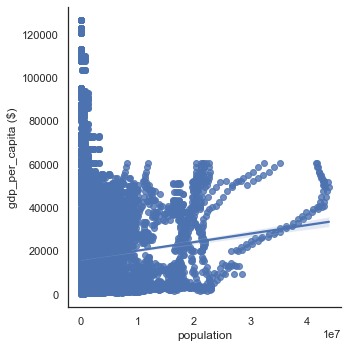

In [91]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="population", y="gdp_per_capita ($)", data=df)
plt.show()

In [93]:
df[df.suicides_no==min(df.suicides_no)]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
9,Albania,1987,female,5-14 years,0,311000,0.0,Albania1987,NaN,"2,156,624,900",796,Generation X
10,Albania,1987,female,55-74 years,0,144600,0.0,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
11,Albania,1987,male,5-14 years,0,338200,0.0,Albania1987,NaN,"2,156,624,900",796,Generation X
22,Albania,1988,female,5-14 years,0,317200,0.0,Albania1988,NaN,"2,126,000,000",769,Generation X
23,Albania,1988,male,5-14 years,0,345000,0.0,Albania1988,NaN,"2,126,000,000",769,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
27363,Uruguay,1998,female,5-14 years,0,262973,0.0,Uruguay1998,NaN,"25,385,928,198",8420,Millenials
27459,Uruguay,2006,female,5-14 years,0,260187,0.0,Uruguay2006,NaN,"19,579,457,966",6362,Millenials
27471,Uruguay,2007,female,5-14 years,0,257931,0.0,Uruguay2007,NaN,"23,410,572,634",7581,Generation Z
27495,Uruguay,2009,male,5-14 years,0,263516,0.0,Uruguay2009,NaN,"31,660,911,277",10166,Generation Z


<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Generation X'),
  Text(1, 0, 'Silent'),
  Text(2, 0, 'G.I. Generation'),
  Text(3, 0, 'Boomers'),
  Text(4, 0, 'Millenials'),
  Text(5, 0, 'Generation Z')])

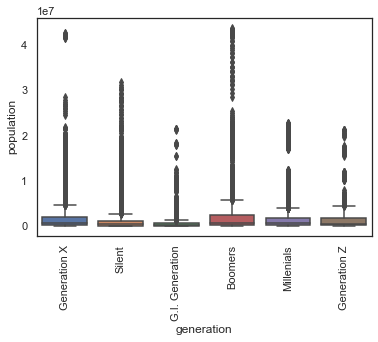

In [94]:
sns.boxplot(x=df['generation'],y=df['population'])
plt.xticks(rotation=90)

<IPython.core.display.Javascript object>

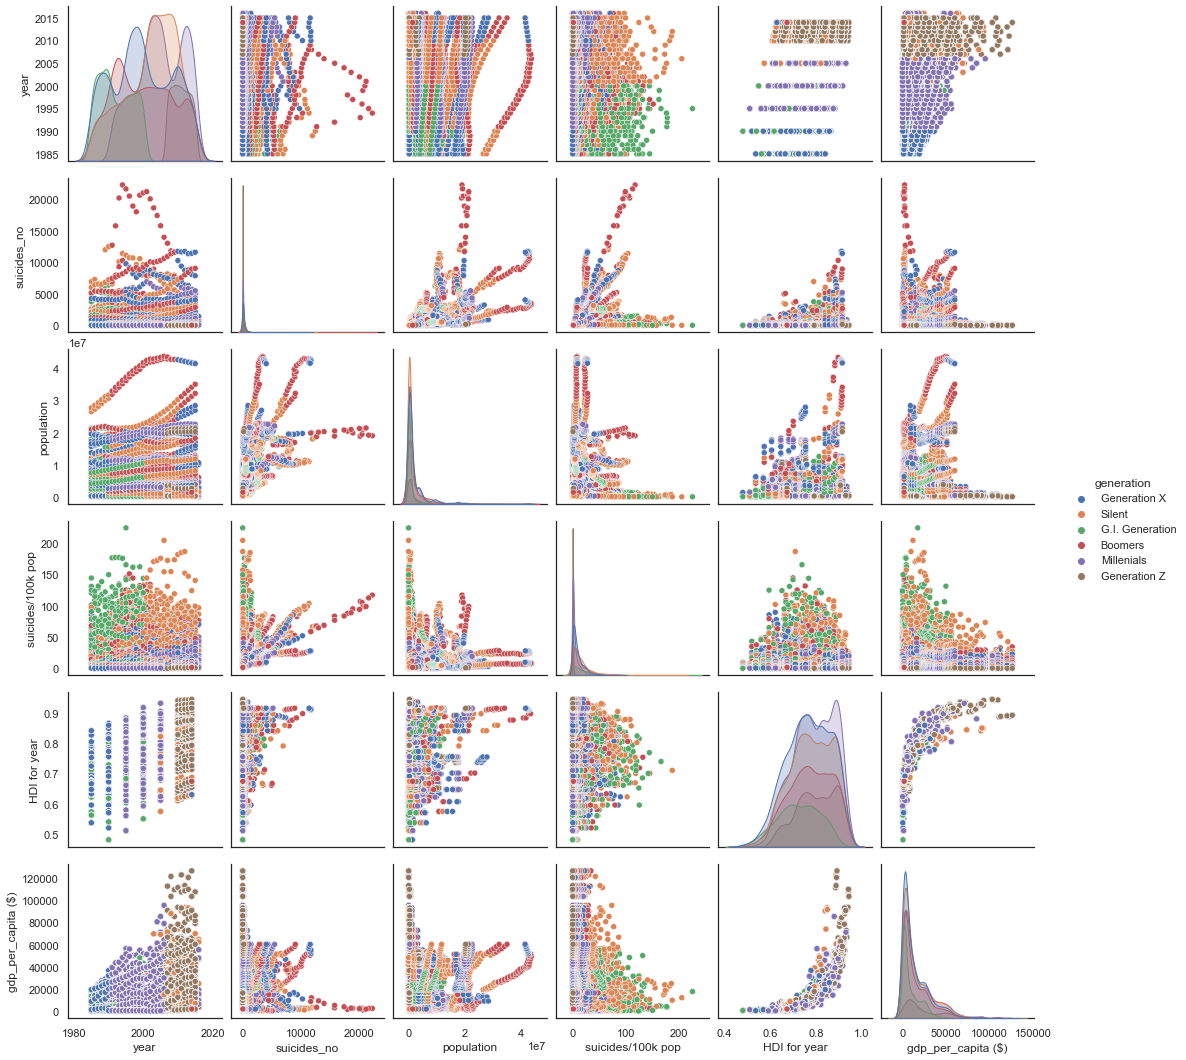

In [96]:
sns.pairplot(df,hue='generation')
plt.show()

<IPython.core.display.Javascript object>

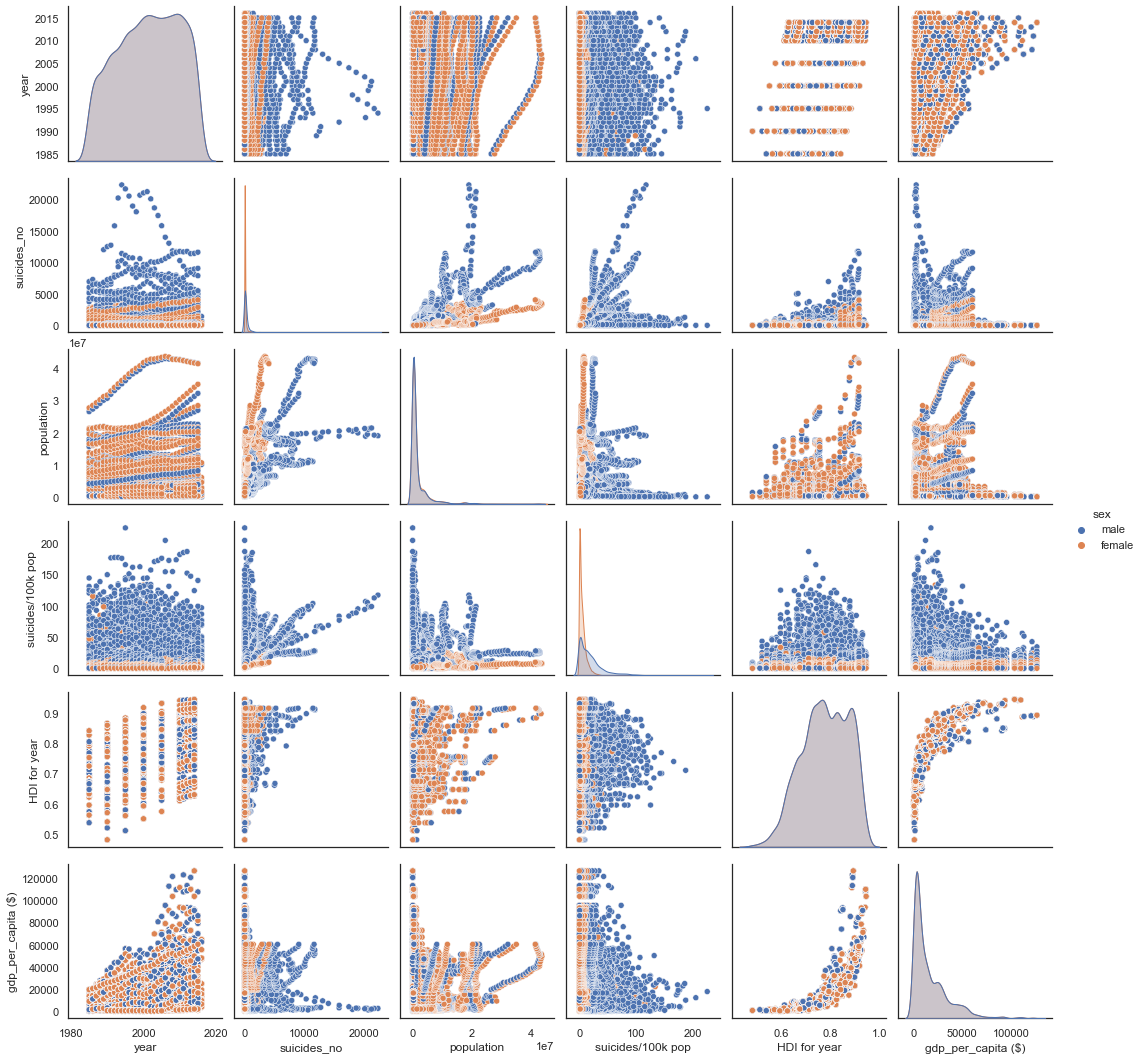

In [97]:
sns.pairplot(df, hue="sex")
plt.show()

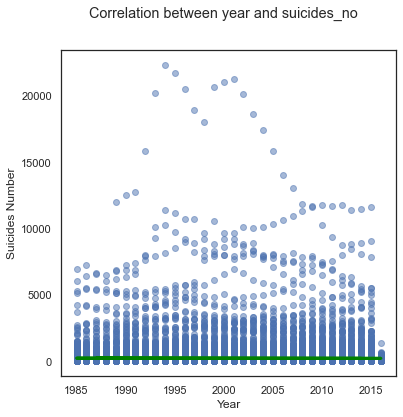

In [104]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Read the CSV file into a DataFrame
df = pd.read_csv("master.csv")

# Extract features (year) and target variable (suicides_no)
x = df["year"].values.reshape(-1, 1)
y = df["suicides_no"].values.reshape(-1, 1)

# Create a linear regression model
regr = linear_model.LinearRegression()

# Fit the model
regr.fit(x, y)

# Plot the results
fig, ax = plt.subplots(figsize=(6, 6))
fig.suptitle("Correlation between year and suicides_no")

ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="green", linewidth=3)

# Set axis locators
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.yaxis.set_major_locator(ticker.MultipleLocator(5000))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1000))

plt.xlabel("Year")
plt.ylabel("Suicides Number")
plt.show()

<IPython.core.display.Javascript object>

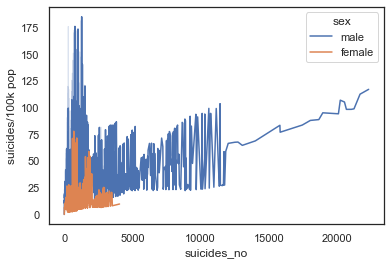

In [108]:
# Plot the responses for different events and regions
sns.lineplot(x="suicides_no", y="suicides/100k pop",
             hue="sex",data=df.sort_values(by='suicides/100k pop',ascending=False))
plt.show()

In [1]:
test = pd.read_csv("master.csv")
train = pd.read_csv("master.csv")
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train columns: ['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']
Test columns: ['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']


In [2]:
y_train = train['sex'].ravel()
train = train.drop(['suicides_no'], axis=1)
x_train = train.values
x_test = test.values

Mean Squared Error: 756322.2079110724
R^2 Score: -7.393722964210703e-05


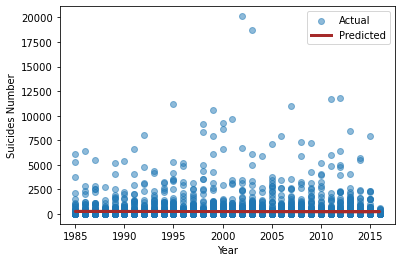

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("master.csv")

# Extract features (year) and target variable (suicides_no)
X = df["year"].values.reshape(-1, 1)
y = df["suicides_no"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
regr = LinearRegression()

# Train the model
regr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='brown', linewidth=3, label='Predicted')
plt.xlabel("Year")
plt.ylabel("Suicides Number")
plt.legend()
plt.show()

Mean Squared Error: 797201.9788695348
R^2 Score: -0.05412866822635842


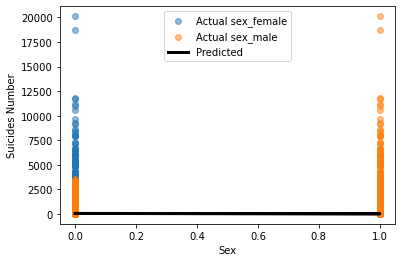

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("master.csv")

# Extract features ('sex') and target variable ('suicides_no')
X = df[['sex']]
y = df['suicides_no']

# One-hot encode the 'sex' column
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create an SVM regression model
svr = SVR()

# Train the model
svr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
for i in range(X_test.shape[1]):
    plt.scatter(X_test[:, i], y_test, alpha=0.5, label=f'Actual {encoder.get_feature_names_out(["sex"])[i]}')

# Plot predicted values
plt.plot(X_test[:, 0], y_pred, color='black', linewidth=3, label='Predicted')

plt.xlabel("Sex")
plt.ylabel("Suicides Number")
plt.legend()
plt.show()

Decision Tree Regression - Mean Squared Error: 738078.3670719399
Decision Tree Regression - R^2 Score: 0.024049630143283096


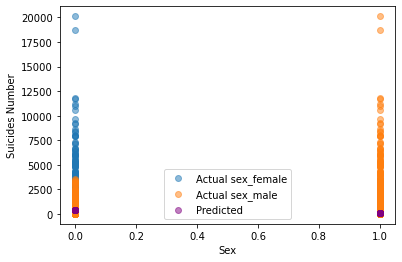

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("master.csv")

# Extract features ('sex') and target variable ('suicides_no')
X = df[['sex']]
y = df['suicides_no']

# One-hot encode the 'sex' column
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a decision tree regression model
dt_reg = DecisionTreeRegressor()

# Train the model
dt_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_reg.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regression - Mean Squared Error: {mse_dt}")
print(f"Decision Tree Regression - R^2 Score: {r2_dt}")

# Plot the results
for i in range(X_test.shape[1]):
    plt.scatter(X_test[:, i], y_test, alpha=0.5, label=f'Actual {encoder.get_feature_names_out(["sex"])[i]}')

plt.scatter(X_test[:, 0], y_pred_dt, color='purple', alpha=0.5, label='Predicted')
plt.xlabel("Sex")
plt.ylabel("Suicides Number")
plt.legend()
plt.show()


Decision Tree Regression - Mean Squared Error: 731029.5670954591
Decision Tree Regression - R^2 Score: 0.03337015659548548


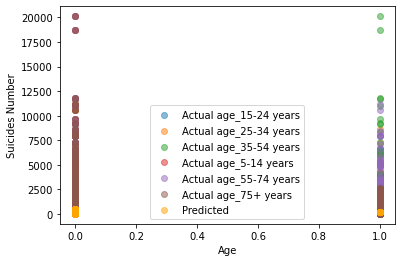

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("master.csv")

# Extract features ('sex') and target variable ('suicides_no')
X = df[['age']]
y = df['suicides_no']

# One-hot encode the 'sex' column
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a decision tree regression model
dt_reg = DecisionTreeRegressor()

# Train the model
dt_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_reg.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regression - Mean Squared Error: {mse_dt}")
print(f"Decision Tree Regression - R^2 Score: {r2_dt}")

# Plot the results
for i in range(X_test.shape[1]):
    plt.scatter(X_test[:, i], y_test, alpha=0.5, label=f'Actual {encoder.get_feature_names_out(["age"])[i]}')

plt.scatter(X_test[:, 0], y_pred_dt, color='orange', alpha=0.5, label='Predicted')
plt.xlabel("Age")
plt.ylabel("Suicides Number")
plt.legend()
plt.show()

Random Forest Regression - Mean Squared Error: 312.64846247052407
Random Forest Regression - R^2 Score: 0.10533623682048265


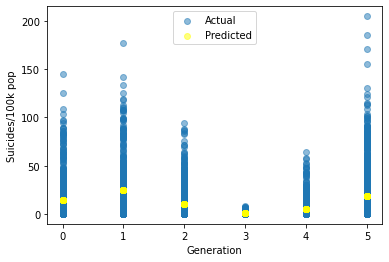

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("master.csv")

# Extract features ('generation') and target variable ('suicides/100k pop')
X = df[['generation']]
y = df['suicides/100k pop']

# Encode the 'generation' column
le = LabelEncoder()
X_encoded = le.fit_transform(X['generation'])

# Reshape to a 2D array
X_encoded = X_encoded.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a random forest regression model
rf_reg = RandomForestRegressor()

# Train the model
rf_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression - Mean Squared Error: {mse_rf}")
print(f"Random Forest Regression - R^2 Score: {r2_rf}")

# Plot the results
plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
plt.scatter(X_test, y_pred_rf, color='yellow', alpha=0.5, label='Predicted')
plt.xlabel("Generation")
plt.ylabel("Suicides/100k pop")
plt.legend()
plt.show()
    